## old


In [2]:
import os
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
import random

In [3]:
dataset_path = './data/dataset/train'

In [4]:
class_name = os.listdir(dataset_path)
class_name

['1', '2', '3', '4', '5']

In [5]:
class_count =Counter()

Class: 1


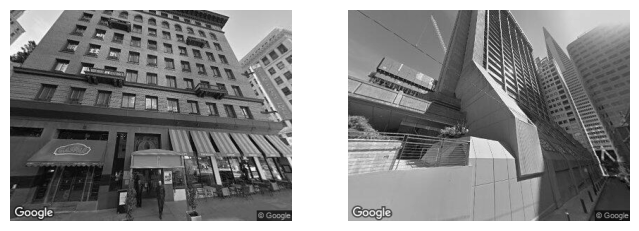

Class: 2


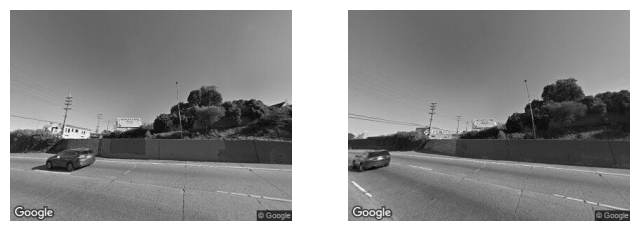

Class: 3


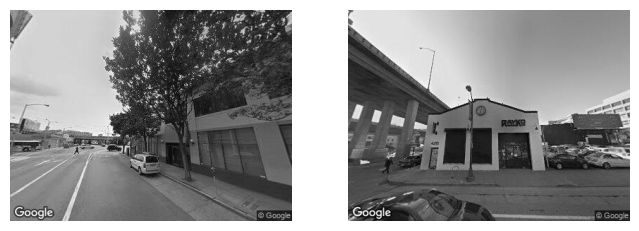

Class: 4


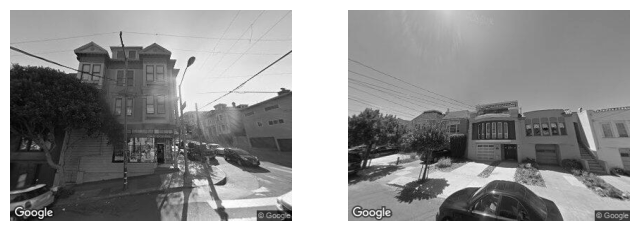

Class: 5


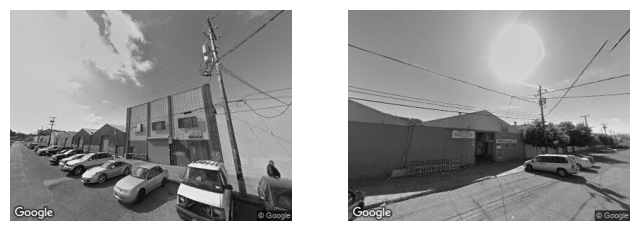

In [16]:
for cls in class_name:
    cls_folder = os.path.join(dataset_path,cls)
    class_count[cls] = len(os.listdir(cls_folder))
    num= random.randint(2,100)
    images = os.listdir(cls_folder)[num-2:num]

    print(f"Class: {cls}")
     # Create a figure to display the images
    fig, axes = plt.subplots(1, 2, figsize=(8, 84))
    for i, img_name in enumerate(images):
        img_path = os.path.join(cls_folder, img_name)
        img = Image.open(img_path)
        axes[i].imshow(img, cmap='gray')
        axes[i].axis('off')
    plt.show()

In [17]:
class_count

Counter({'4': 914, '3': 731, '2': 362, '1': 299, '5': 210})

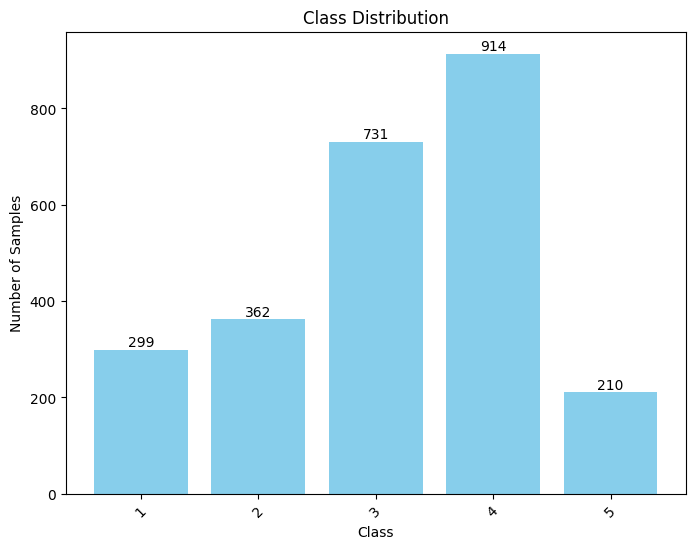

In [18]:
plt.figure(figsize = (8,6))
bars =plt.bar(class_count.keys(),class_count.values(), color= 'skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
plt.savefig('class-distro.png')    
plt.show()


In [23]:
# Function to plot the average pixel intensity distribution for 10 images in each class
def plot_class_average_pixel_intensities(dataset_path,class_name):
 
    for class_name in class_name:
        class_folder = os.path.join(dataset_path, class_name)
        images = os.listdir(class_folder) # Limit to first 10 images
        
        # Initialize a list to hold all pixel intensities for averaging
        summed_intensities = np.zeros(256)  # For grayscale, 256 intensity levels
        
        # Loop through the first n images in the class folder
        for img_name in images:
            img_path = os.path.join(class_folder, img_name)
            img = Image.open(img_path)
            img_array = np.array(img)
            
            # Compute histogram of pixel intensities for the current image
            hist, _ = np.histogram(img_array.flatten(), bins=256, range=(0, 255))
            
            # Add to the sum of pixel intensities
            summed_intensities += hist
        
        # Compute the average by dividing by the number of images (10)
        avg_intensities = summed_intensities / len(images)
        
        # Plot average pixel intensity distribution for the current class
        plt.figure(figsize=(6, 4))
        plt.plot(avg_intensities, color='red')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Average Frequency')
        plt.title(f'Average Pixel Intensity Distribution - Class: {class_name} with {class_count[class_name]} samples')
        plt.tight_layout()
        plt.show()

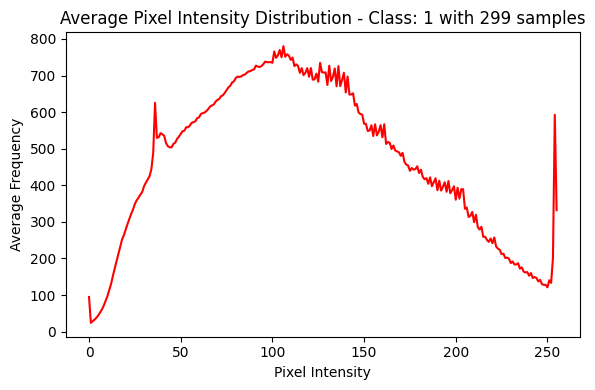

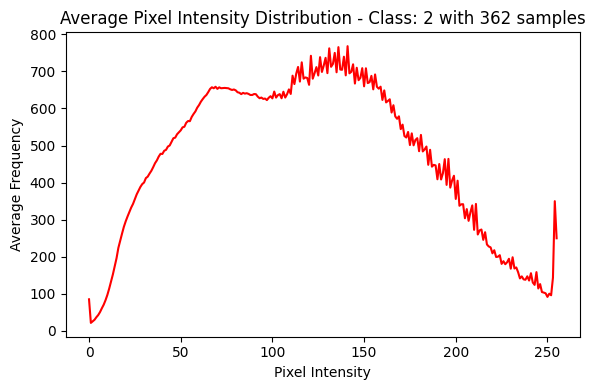

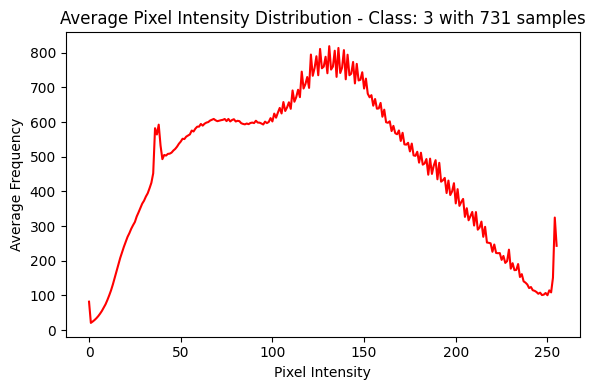

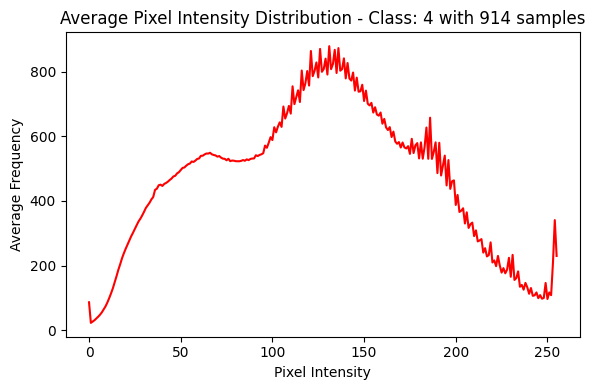

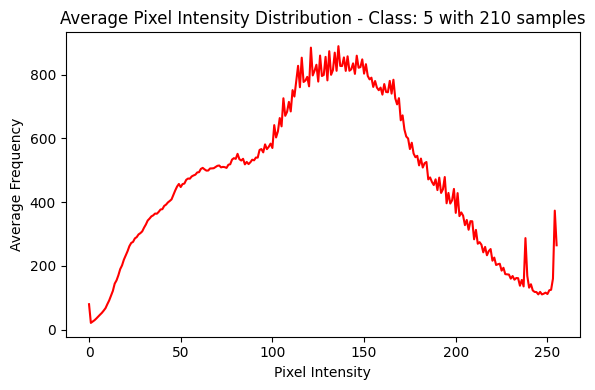

In [24]:
# Call the function to plot summaries
plot_class_average_pixel_intensities(dataset_path,class_name)

In [29]:
import pandas as pd

In [32]:
csv_path = './data/csv_data/image_features.csv'

In [33]:
data = pd.read_csv(csv_path)

In [34]:
# Summary statistics for numerical features
print(data.describe())

             class    feature_0    feature_1    feature_2    feature_3  \
count  2516.000000  2516.000000  2516.000000  2516.000000  2516.000000   
mean      3.148649     0.240979     0.045093     0.050746     0.027983   
std       1.137890     0.129572     0.079148     0.075963     0.051562   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     0.158983     0.000000     0.000000     0.000000   
50%       3.000000     0.262632     0.000000     0.019489     0.000000   
75%       4.000000     0.324690     0.056421     0.070012     0.036906   
max       5.000000     0.707107     0.512591     0.466085     0.413685   

         feature_4    feature_5    feature_6    feature_7    feature_8  ...  \
count  2516.000000  2516.000000  2516.000000  2516.000000  2516.000000  ...   
mean      0.171936     0.049261     0.122627     0.096616     0.061261  ...   
std       0.129137     0.077414     0.120974     0.115082     0.093111  ...   
min       0.00000

In [43]:
# Drop the first column if it's an index or unwanted column
data_drop = data.drop(data.columns[0], axis=1)  # Adjust index if needed

# Now check the shape again
print(data_drop.shape)

(2516, 63529)


In [44]:
# Select only the first 63530 columns
data_drop = data.iloc[:, :63530]  # Adjust if necessary

# Now check the shape again
print(data_drop.shape)

(2516, 63530)


In [45]:
# Find factors of 63530 for image dimensions
factors = []
for i in range(1, int(np.sqrt(63530)) + 1):
    if 63530 % i == 0:
        factors.append(i)
        if i != 63530 // i:
            factors.append(63530 // i)

factors = sorted(set(factors))
print("Possible image dimensions:", factors)

Possible image dimensions: [1, 2, 5, 10, 6353, 12706, 31765, 63530]


In [49]:
import seaborn as sns

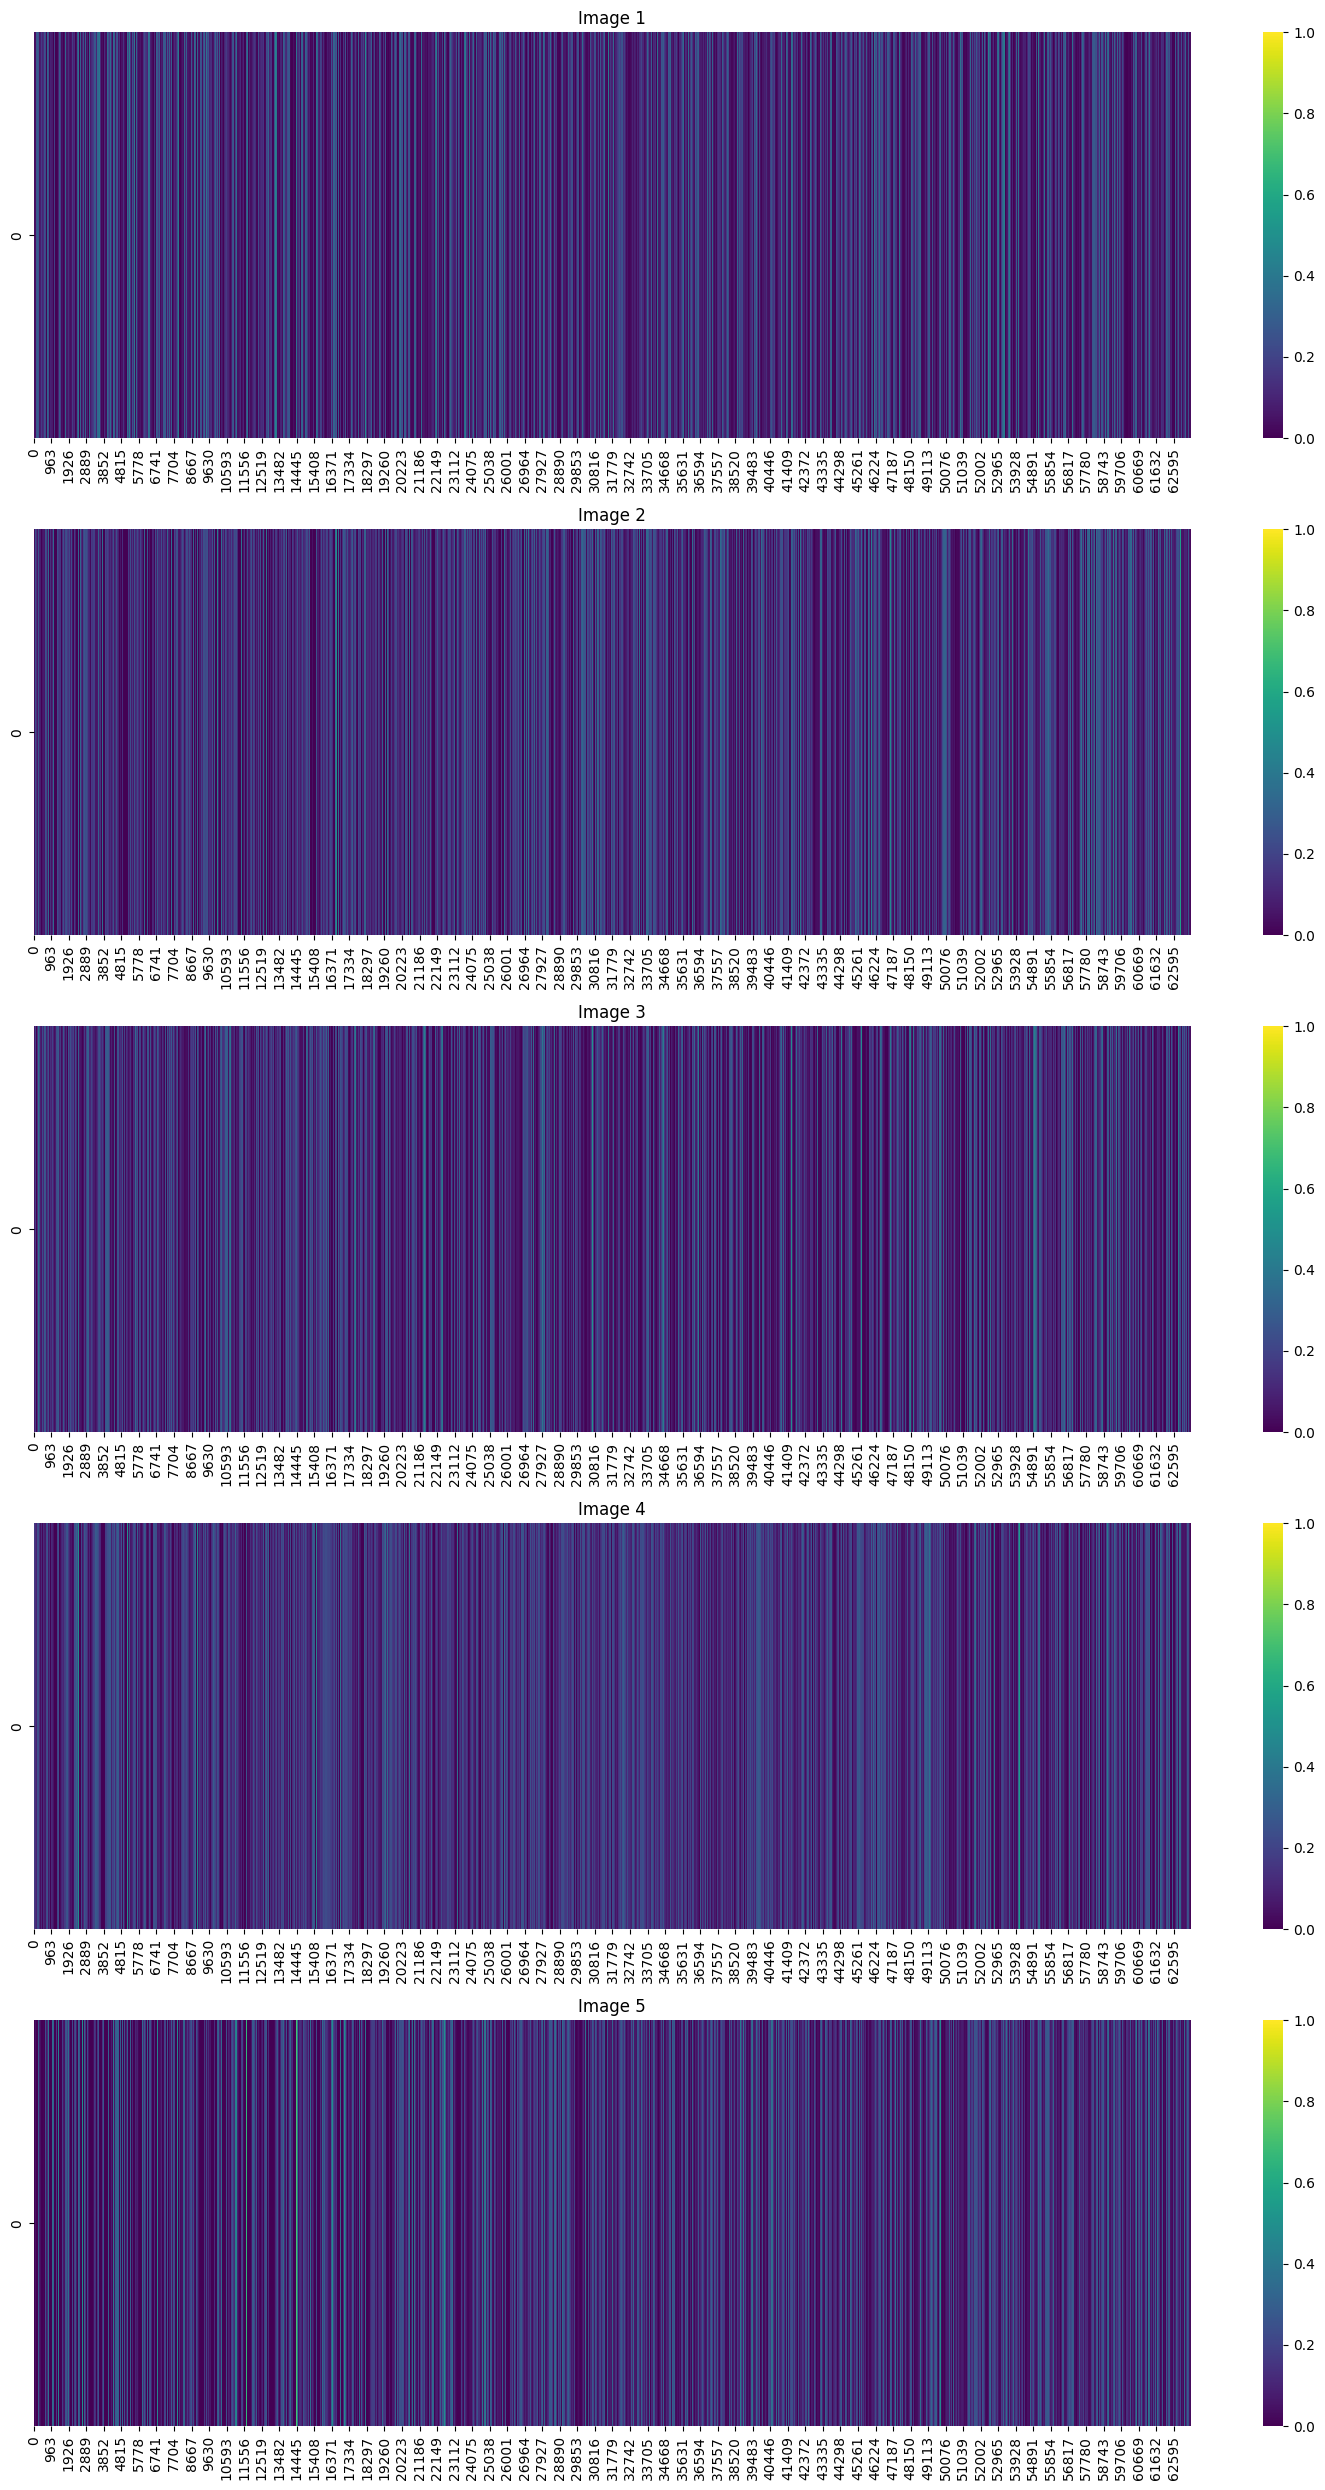

In [50]:
# Function to plot images as heatmaps
def plot_heatmaps(data, num_images=5):
    plt.figure(figsize=(15, 5 * num_images))
    
    for i in range(num_images):
        plt.subplot(num_images, 1, i + 1)
        sns.heatmap(data.iloc[i].values.reshape(1, -1), cmap='viridis', cbar=True)
        plt.title(f'Image {i + 1}')
        
    plt.tight_layout()
    plt.show()

# Display the first five images as heatmaps
plot_heatmaps(data_drop)

## new

In [ ]:
dataset_two_path = './mlcps project files/dataset/train'
dataset_one_path = './data/dataset/train'

Total samples in Dataset One: 2516
Total samples in Dataset Two: 2175


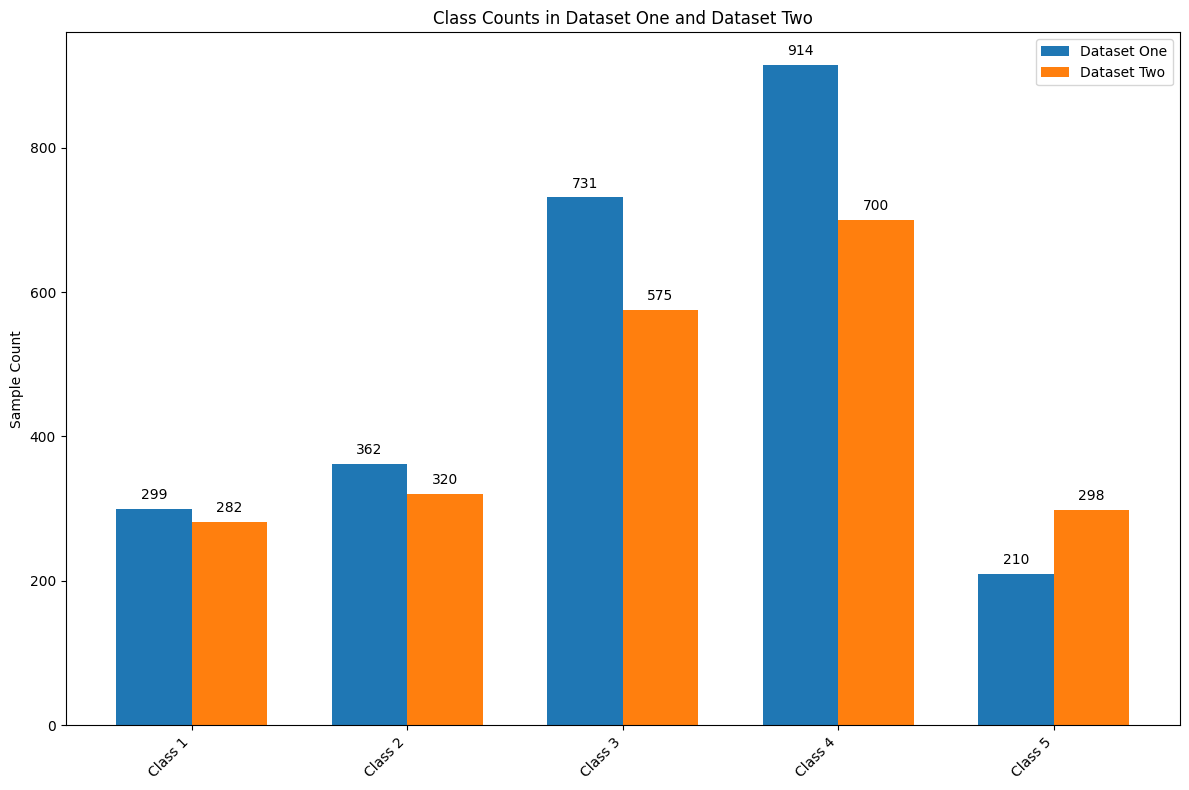

In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Define the paths to your datasets
dataset_two_path = './mlcps project files/dataset/train'
dataset_one_path = './data/dataset/train'

# Get the list of classes (assuming both datasets have the same classes)
classes = sorted([d for d in os.listdir(dataset_one_path) if os.path.isdir(os.path.join(dataset_one_path, d))])

# Initialize dictionaries to store counts
counts_one = {}
counts_two = {}

# Count the number of samples in each class for both datasets
for cls in classes:
    class_path_one = os.path.join(dataset_one_path, cls)
    class_path_two = os.path.join(dataset_two_path, cls)
    
    # Get the list of files in each class directory (excluding hidden files and subdirectories)
    samples_one = [f for f in os.listdir(class_path_one) if os.path.isfile(os.path.join(class_path_one, f)) and not f.startswith('.')]
    samples_two = [f for f in os.listdir(class_path_two) if os.path.isfile(os.path.join(class_path_two, f)) and not f.startswith('.')]
    
    counts_one[cls] = len(samples_one)
    counts_two[cls] = len(samples_two)

# Calculate total counts for both datasets
total_count_one = sum(counts_one.values())
total_count_two = sum(counts_two.values())

# Print total counts
print(f"Total samples in Dataset One: {total_count_one}")
print(f"Total samples in Dataset Two: {total_count_two}")

# Prepare data for plotting
labels = ['Class {}'.format(i+1) for i in range(len(classes))]  # Label classes as Class 1, Class 2, etc.
counts1 = [counts_one[cls] for cls in classes]
counts2 = [counts_two[cls] for cls in classes]

x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, counts1, width, label='Dataset One')
rects2 = ax.bar(x + width/2, counts2, width, label='Dataset Two')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Sample Count')
ax.set_title('Class Counts in Dataset One and Dataset Two')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

# Function to attach a text label above each bar displaying its height
def autolabel(rects):
    """Attach a text label displaying the height of each bar."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # Offset text by 5 points vertically
                    textcoords='offset points',
                    ha='center', va='bottom')

# Apply the autolabel function to both sets of bars
autolabel(rects1)
autolabel(rects2)
# Adjust layout
fig.tight_layout()

# Save the figure
fig.savefig('class_counts_comparison.png', bbox_inches='tight')

# Display the plot
plt.show()



Total samples in Dataset One: 2516
Total samples in Dataset Two: 2175

Statistical Summary for Dataset One:
count      5.000000
mean     503.200000
std      303.418358
min      210.000000
25%      299.000000
50%      362.000000
75%      731.000000
max      914.000000
dtype: float64 

Statistical Summary for Dataset Two:
count      5.000000
mean     435.000000
std      190.543958
min      282.000000
25%      298.000000
50%      320.000000
75%      575.000000
max      700.000000
dtype: float64 



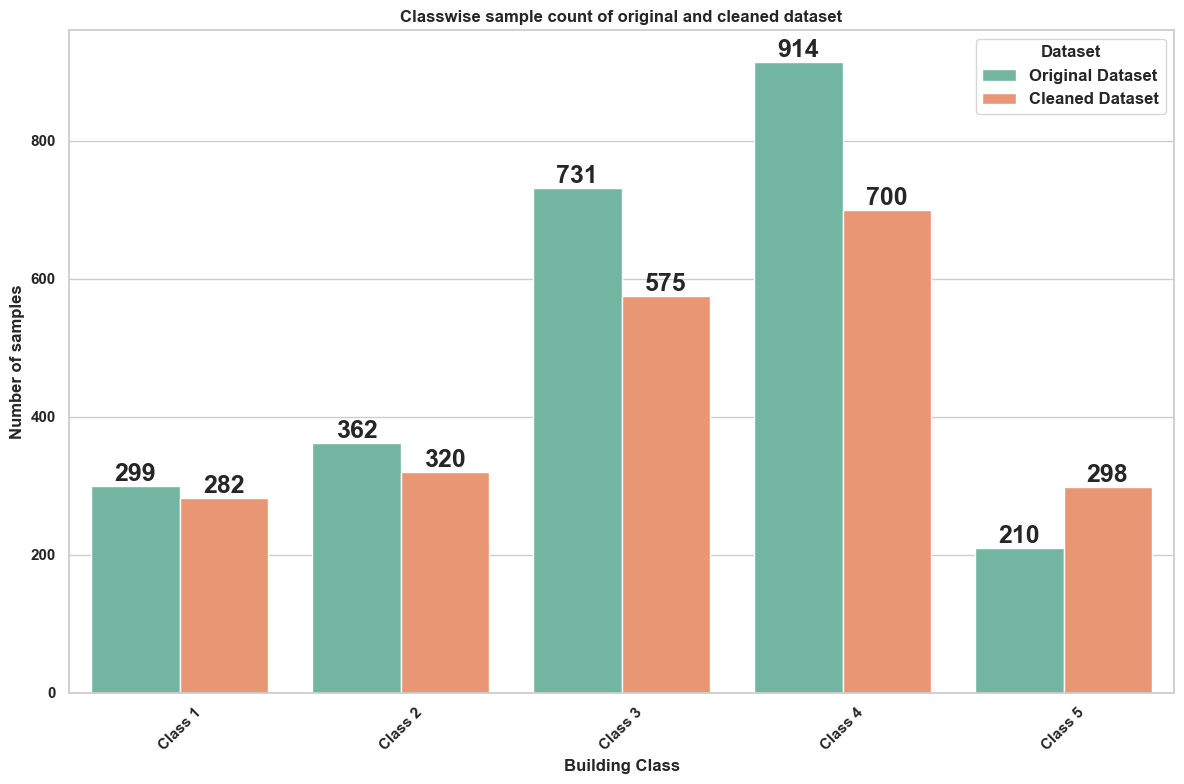

In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

# Define the paths to your datasets
dataset_two_path = './mlcps project files/dataset/train'
dataset_one_path = './data/dataset/train'


# Get the list of classes (assuming both datasets have the same classes)
classes = sorted([d for d in os.listdir(dataset_one_path) if os.path.isdir(os.path.join(dataset_one_path, d))])

# Initialize dictionaries to store counts
counts_one = {}
counts_two = {}

# Count the number of samples in each class for both datasets
for cls in classes:
    class_path_one = os.path.join(dataset_one_path, cls)
    class_path_two = os.path.join(dataset_two_path, cls)
    
    # Get the list of files in each class directory (excluding hidden files and subdirectories)
    samples_one = [f for f in os.listdir(class_path_one) if os.path.isfile(os.path.join(class_path_one, f)) and not f.startswith('.')]
    samples_two = [f for f in os.listdir(class_path_two) if os.path.isfile(os.path.join(class_path_two, f)) and not f.startswith('.')]
    
    counts_one[cls] = len(samples_one)
    counts_two[cls] = len(samples_two)

# Create pandas Series for statistical analysis
counts_one_series = pd.Series(counts_one)
counts_two_series = pd.Series(counts_two)

# Calculate total counts for both datasets
total_count_one = counts_one_series.sum()
total_count_two = counts_two_series.sum()

# Print total counts
print(f"Total samples in Dataset One: {total_count_one}")
print(f"Total samples in Dataset Two: {total_count_two}\n")

# Generate statistical reports
print("Statistical Summary for Dataset One:")
print(counts_one_series.describe(), "\n")

print("Statistical Summary for Dataset Two:")
print(counts_two_series.describe(), "\n")

# Prepare data for plotting with seaborn
data = []

for i, cls in enumerate(classes):
    data.append({'Class': f'Class {i+1}', 'Dataset': 'Original Dataset', 'Count': counts_one[cls]})
    data.append({'Class': f'Class {i+1}', 'Dataset': 'Cleaned Dataset', 'Count': counts_two[cls]})

df = pd.DataFrame(data)

# Set the seaborn style
sns.set(style="whitegrid")

# Create font properties for bold text
bold_font = FontProperties(weight='bold', size=12)

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Class', y='Count', hue='Dataset', data=df, palette='Set2')

# Add count labels on top of each bar with larger font size
# Fixing the annotation to avoid zeros
# Get the positions and heights of the bars
for c in ax.containers:
    # Optional: if the data labels may not be needed, skip labels with zero height
    labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', fontsize=18, fontweight='bold')

# Customize the plot
plt.title('Classwise sample count of original and cleaned dataset', fontweight='bold')
plt.xlabel('Building Class', fontweight='bold')
plt.ylabel('Number of samples', fontweight='bold')

# Create legend and make labels bold
legend = plt.legend(title='Dataset', prop=bold_font)
legend.get_title().set_fontweight('bold')  # Make legend title bold

# Make tick labels bold
plt.xticks(rotation=45, fontweight='bold')
plt.yticks(fontweight='bold')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('class_counts_comparison.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()



C:\Users\prave\AppData\Local\Temp\ipykernel_22096\3183884182.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dataset', y='Count', data=df, palette='Set2')


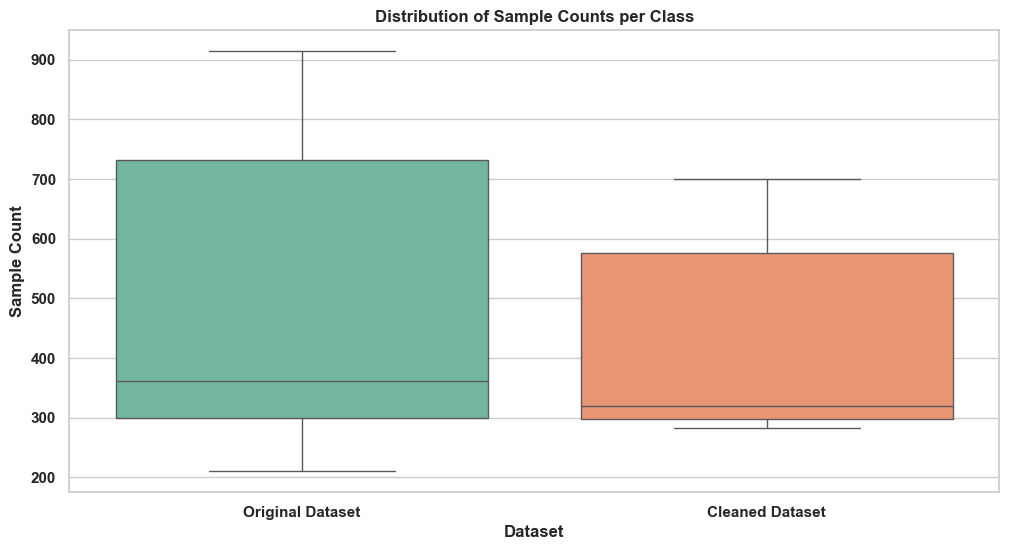

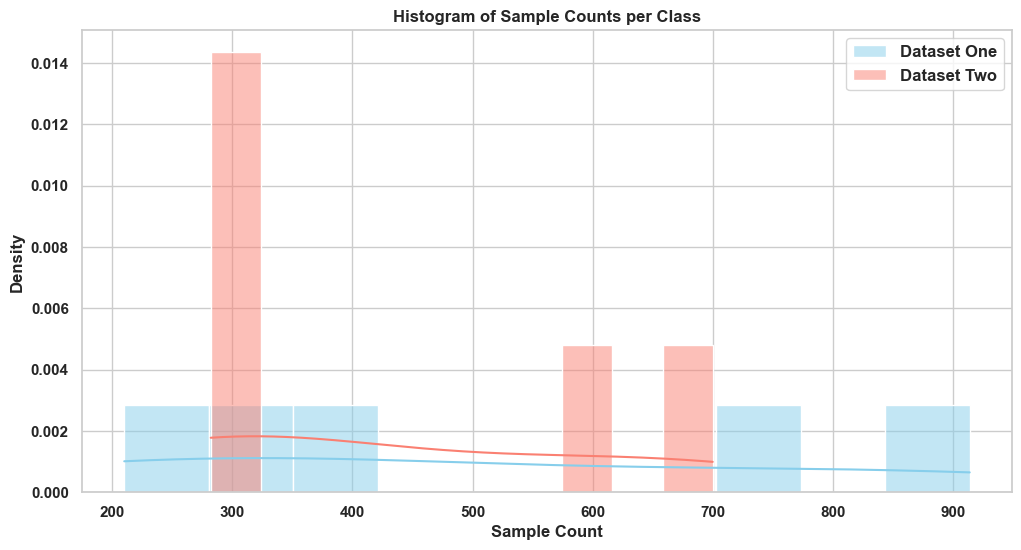

In [30]:

# Plot box plots to visualize dispersion
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dataset', y='Count', data=df, palette='Set2')

# Customize the plot
plt.title('Distribution of Sample Counts per Class', fontweight='bold')
plt.xlabel('Dataset', fontweight='bold')
plt.ylabel('Sample Count', fontweight='bold')

# Make tick labels bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Save the figure
plt.savefig('sample_counts_boxplot.png', bbox_inches='tight', dpi=300)
plt.show()

# Plot histograms to visualize distribution
plt.figure(figsize=(12, 6))
sns.histplot(counts_one_series, bins=10, kde=True, color='skyblue', label='Dataset One', stat='density')
sns.histplot(counts_two_series, bins=10, kde=True, color='salmon', label='Dataset Two', stat='density')

# Customize the plot
plt.title('Histogram of Sample Counts per Class', fontweight='bold')
plt.xlabel('Sample Count', fontweight='bold')
plt.ylabel('Density', fontweight='bold')

# Create legend and make labels bold
legend = plt.legend(prop=bold_font)
legend.get_title().set_fontweight('bold')  # If you have a title

# Make tick labels bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Save the figure
plt.savefig('sample_counts_histogram.png', bbox_inches='tight', dpi=300)
plt.show()